# Python 基本語法與科學計算套件的使用： Python科學計算套件(二)

## 四堂課程大綱
- 第一堂-Python 基礎(一)：Python 簡介及環境建立、Python程式的編寫及執行、資料型態、基本輸入輸出、流程控制
- 第二堂-Python 基礎(二)：檔案讀寫、例外處理、函數、模組、物件導向
- 第三堂-Python科學計算套件(一)：Numpy、Matplotlib 
- 第四堂-Python科學計算套件(二)：Scipy、Astropy

## Scipy

### Scipy中的模組
- 特殊函數 (<a href="http://docs.scipy.org/doc/scipy/reference/tutorial/special.html" target="_blank">scipy.special</a>)
- 數值積分/解微分方程 (<a href="http://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html" target="_blank">scipy.integrate</a>)
- 最佳化/擬合/求根 (<a href="http://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html" target="_blank">scipy.optimize</a>)
- 內插 (<a href="http://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html" target="_blank">scipy.interpolate</a>)
- Fourier 轉換 (<a href="http://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html" target="_blank">scipy.fftpack</a>)
- 訊號處理 (<a href="http://docs.scipy.org/doc/scipy/reference/tutorial/signal.html" target="_blank">scipy.signal</a>)
- 線性代數 (<a href="http://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html" target="_blank">scipy.linalg</a>)
- 機率分佈/統計函數 (<a href="http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html" target="_blank">scipy.stats</a>)
- 多維影像處理 (<a href="http://docs.scipy.org/doc/scipy/reference/tutorial/ndimage.html" target="_blank">scipy.ndimage</a>)
- ...

### Scipy範例：曲線擬合

In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

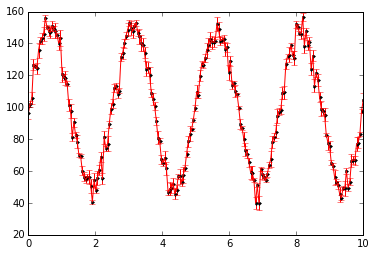

In [2]:
time = np.linspace(0, 10, 200)
counts = 50 * np.sin(2 * np.pi * 1. / 2.5 * time) + 100  +  np.random.normal(0, 5., len(time))
plt.plot(time, counts, 'k.')
counts_err = 4 * np.random.rand(len(time)) + 1
plt.errorbar(time, counts, yerr=counts_err, fmt="r")

In [3]:
def lc_model(time, amplitude, period, dc):
    return amplitude * np.sin(2 * np.pi * 1. / period * time) + dc

In [4]:
popt, pcov = curve_fit(lc_model, time, counts,  p0=[50, 2.5, 100], sigma=counts_err)
print(popt)
print(pcov)

[ 49.85353949   2.50166026  99.89739415]
[[  2.22598077e-01   5.26041656e-06   1.51224999e-02]
 [  5.26041656e-06   2.45107993e-06   2.79458011e-05]
 [  1.51224999e-02   2.79458011e-05   1.12455146e-01]]


In [5]:
perr = np.sqrt(np.diag(pcov))
print("Amplitude =", popt[0], "+/-", perr[0])
print("Period =", popt[1], "+/-", perr[1])
print("DC =", popt[2], "+/-", perr[2])

Amplitude = 49.8535394854 +/- 0.471803006579
Period = 2.50166026043 +/- 0.0015655925175
DC = 99.8973941468 +/- 0.335343325886


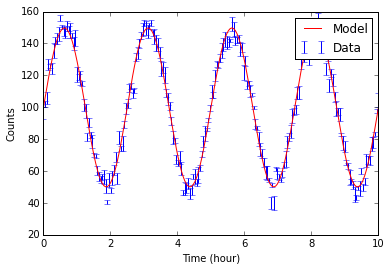

In [6]:
plt.errorbar(time, counts, yerr=counts_err, fmt="none", label='Data')
plt.plot(time, lc_model(time, popt[0], popt[1], popt[2]),'r-', label='Model')
plt.xlabel('Time (hour)')
plt.ylabel('Counts')
plt.legend()

## Astropy

### Astropy中的模組

- 物理常數及單位換算 (<a href="http://docs.astropy.org/en/stable/constants/index.html" target="_blank">astropy.constants</a>, <a href="http://docs.astropy.org/en/stable/units/index.html" target="_blank">astropy.units</a>)
- 資料表格操作 (<a href="http://docs.astropy.org/en/stable/table/index.html" target="_blank">astropy.table</a>)
- 天球座標系統轉換 (<a href="http://docs.astropy.org/en/stable/coordinates/index.html" target="_blank">astropy.coordinates</a>)
- 資料擬合 (<a href="http://docs.astropy.org/en/stable/modeling/index.html" target="_blank">astropy.modeling</a>)
- FITS檔操作 (<a href="http://docs.astropy.org/en/stable/io/fits/index.html" target="_blank">astropy.io.fits</a>)
- ...

### Astropy範例：FITS檔操作

In [7]:
from astropy.io import fits
hdulist = fits.open("XTE_J1550_564_30191011500A_2_13kev_0.01s_0_2505s.fits")
hdulist.info()

Filename: XTE_J1550_564_30191011500A_2_13kev_0.01s_0_2505s.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      30   ()              
1    RATE        BinTableHDU     82   250500R x 5C   [D, E, E, E, 1D]   
2    STDGTI      BinTableHDU     41   1R x 2C      [1D, 1D]   


In [8]:
primary = hdulist[0]
primary.header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CONTENT = 'LIGHT CURVE'        / light curve file                               
ORIGIN  = 'NASA/GSFC/XTE/GOF'  / origin of fits file                            
DATE    = '2013-07-22T06:57:10' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
TELESCOP= 'XTE     '           / Telescope (mission) name                       
INSTRUME= 'PCA     '           / Instrument used for observation                
MJDREFI =                49353 / Integer part of MJDREF                         
MJDREFF = 6.965740740000000E

In [9]:
print(primary.header['OBJECT '])

XTE_J1550-564


In [10]:
rate = hdulist[1]
rate.data

FITS_rec([(149663661.37843132, 17682.732, 1329.1155, 1.0009766, 149663476.18321466),
       (149663661.38843131, 20479.963, 1430.3768, 1.0009766, 149663476.193214),
       (149663661.39843133, 19281.191, 1387.8818, 1.0009766, 149663476.20321333),
       ...,
       (149666166.34843132, 1498.5366, 386.91968, 1.0009766, 149665980.97182214),
       (149666166.35843131, 1398.6373, 373.80069, 1.0009766, 149665980.98182136),
       (149666166.36843133, 1618.1729, 404.54321, 0.98876953, 149665980.9918206)], 
      dtype=[('TIME', '>f8'), ('RATE', '>f4'), ('ERROR', '>f4'), ('FRACEXP', '>f4'), ('BARYTIME', '>f8')])

In [11]:
print(rate.data.shape)
print(rate.data.field(1))

(250500,)
[ 17682.73242188  20479.96289062  19281.19140625 ...,   1498.53662109
   1398.6373291    1618.17285156]


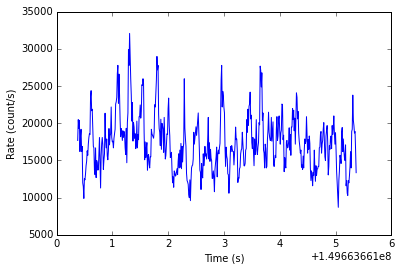

In [12]:
time = rate.data.field(0)[:500]
counts = rate.data.field(1)[:500]
plt.plot(time, counts)
plt.xlabel('Time (s)')
plt.ylabel('Rate (count/s)')

In [13]:
hdulist.close()

## 作業小專題

- 修改上堂課的作業，用Scipy的curve_fit擬合所模擬出的X-ray光變曲線觀測資料
- 在天文資料庫下載實際的X-ray觀測資料(光變曲線)FITS檔，用Astropy查看其資訊，並畫出光變曲線

## 補充文件
- <a href="http://docs.scipy.org/doc/scipy/reference/" target="_blank">Scipy官方文件</a>
- <a href="http://docs.astropy.org/en/stable/" target="_blank">Astropy官方文件</a>
- <a href="http://www2.mpia-hd.mpg.de/~robitaille/PY4SCI_SS_2015/" target="_blank">Python for Scientists (天文學家Thomas Robitaille 的課程筆記)</a>
- <a href="http://python4vienna.readthedocs.org/en/latest/" target="_blank">Vienna Python/Astropy Workshop (天文學家Thomas Robitaille 的課程筆記)</a>
- <a href="http://www.astro.washington.edu/users/vanderplas/Astr599_2014/" target="_blank">Scientific Computing with Python (天文學家Jake VanderPlas的課程筆記)</a>
- <a href="http://www.astro.ncu.edu.tw/~yhsu/yhsu/%E5%BB%BA%E7%AB%8B%E7%94%A8%E6%96%BC%E7%A7%91%E5%AD%B8%E8%A8%88%E7%AE%97%E7%9A%84python%E9%96%8B%E7%99%BC%E7%92%B0%E5%A2%83/#%E5%AD%B8%E7%BF%92%E8%B3%87%E6%BA%90" target="_blank">更多學習資源</a>

## 授權條款 ##

「Python在天文研究上的應用之系列文章」由<a href="https://github.com/YihaoSu">蘇羿豪</a>製作，以<a href="https://github.com/YihaoSu/astropython-notes/blob/master/LICENSE">MIT授權條款</a>釋出。

此系列文章是用IPython Notebook編寫，若你想要修改重製文章，可在終端機輸入以下指令(需安裝<a href="http://git-scm.com/downloads" target="_blank">git</a>)下載原始碼：

``` shell
git clone https://github.com/YihaoSu/astropython-notes.git
```
或者直接下載原始碼壓縮檔 https://github.com/YihaoSu/astropython-notes/archive/master.zip